In [2]:
import re
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

# Instructions
- Set appropriate obstacle params
- Run the cells to generate a data file
- Manually copy and paste the data lines into the original initial data created by LAMMPS

In [3]:
#Obstacle parameters
sf = 0.1 #spacing
D = 8 #diameter
center = [144/2,0] #circle center coordinates
thickness = sf*3 #this needs to be set greater than min_thickness
print("Minimum thickness: " + str(thickness))


#Initial parameters
n_start = 686181 #atoms in the original (fluid only) data file
type = 2 #type designation for the obstacle particles
rho0 = 1.0
T0 = 1.0
phase = 5


Minimum thickness: 0.30000000000000004


[3.7 3.8 3.9 4. ]


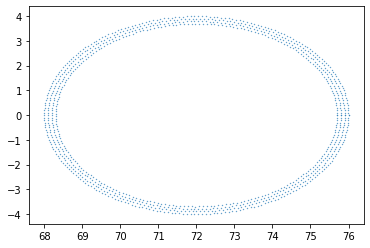

In [4]:
data_x = np.asarray([])
data_y = np.asarray([])
radii = np.arange((D/2)-thickness,(D/2)+sf,sf)
print(radii)
n_atoms = 0
for count, radius in enumerate(radii):
    n_atoms_ring = np.rint(2*radius*np.pi/sf)
    theta = np.linspace(0,2*np.pi,int(n_atoms_ring))
    x = (radius * np.cos(theta))+center[0]
    y = (radius * np.sin(theta))+center[1]
    data_x=np.concatenate([data_x,x])
    data_y=np.concatenate([data_y,y])
    # data_x.append(x)
    # data_y.append(y)
    n_atoms+=len(theta)

plt.scatter(data_x,data_y,s=0.1)

In [8]:
#Write the datapoints into a datafile
with open("obstacle_data_10.data","w") as fdata:
    fdata.write("obstacle atom data\n\n")
    
    #These are already included in the lammps-generated data file
    # #---Header---#
    # fdata.write("{} atoms\n".format(n_atoms)) #total atoms
    # fdata.write("{} atom types\n\n".format(2)) #types of atoms
    
    # #Box dimensions
    # fdata.write("{} {} xlo xhi\n".format(x_min, x_max))
    # fdata.write("{} {} ylo yhi\n".format(y_min, y_max))
    # fdata.write("{} {} zlo zhi\n".format(-0.1*sf, 0.1*sf))
    # fdata.write("\n")
    
    # #---Atom Type Mass---#
    # fdata.write("Masses \n\n")
    # fdata.write("{} {} \n".format(1, 0.25))
    # fdata.write("{} {} \n".format(2, 0.25))
    # fdata.write("\n")

    #---Atoms---#
    fdata.write("Atoms # rheo \n\n")
    
    
    for n in range(n_atoms):
        #fields_data_atom = (char *) "id type rho temp phase x"
        fdata.write("{} {} {} {} {} {} {} {} {} {} {}\n".format(n_start+n+1,type,rho0,T0,phase,data_x[n],data_y[n],0.0, 0, 0, 0))
    
    #---Velocities---#
    fdata.write("Velocities \n\n")
    for n in range(n_atoms):
        fdata.write("{} {} {} {}\n".format(n_start+n+1, 0.0, 0.0, 0.0))

    